In [1]:
from google.colab import drive
drive.mount('/content/Drive', force_remount=True)

Mounted at /content/Drive


In [2]:
import glob
from scipy.io import wavfile
Data=[]
Target=[]

# Angry
path = "/content/Drive/MyDrive/DataSet/Emotional speech/TESS Dataset/OAF_angry/*.wav"
for file in glob.glob(path):
  c=1
  try:
    samplerate, data = wavfile.read(file)
  except:
    c=0
  if(c==1):
    data=data[:20000]
    Data.append(data)
    Target.append(0)


path = "/content/Drive/MyDrive/DataSet/Emotional speech/TESS Dataset/YAF_angry/*.wav"
for file in glob.glob(path):
    c=1
    try:
      samplerate, data = wavfile.read(file)
    except:
      c=0
    if(c==1):
      data=data[:20000]
      Data.append(data)
      Target.append(0)

# Disgust
path = "/content/Drive/MyDrive/DataSet/Emotional speech/TESS Dataset/OAF_disgust/*.wav"
for file in glob.glob(path):
    c=1
    try:
      samplerate, data = wavfile.read(file)
    except:
      c=0
    if(c==1):
      data=data[:20000]
      Data.append(data)
      Target.append(1)

path = "/content/Drive/MyDrive/DataSet/Emotional speech/TESS Dataset/YAF_disgust/*.wav"
for file in glob.glob(path):
    c=1
    try:
      samplerate, data = wavfile.read(file)
    except:
      c=0
    if(c==1):
      data=data[:20000]
      Data.append(data)
      Target.append(1)

# Fear
path = "/content/Drive/MyDrive/DataSet/Emotional speech/TESS Dataset/OAF_Fear/*.wav"
for file in glob.glob(path):
    c=1
    try:
      samplerate, data = wavfile.read(file)
    except:
      c=0
    if(c==1):
      data=data[:20000]
      Data.append(data)
      Target.append(2)

path = "/content/Drive/MyDrive/DataSet/Emotional speech/TESS Dataset/YAF_Fear/*.wav"
for file in glob.glob(path):
    c=1
    try:
      samplerate, data = wavfile.read(file)
    except:
      c=0
    if(c==1):
      data=data[:20000]
      Data.append(data)
      Target.append(2)

# Happy
path = "/content/Drive/MyDrive/DataSet/Emotional speech/TESS Dataset/OAF_happy/*.wav"
for file in glob.glob(path):
    c=1
    try:
      samplerate, data = wavfile.read(file)
    except:
      c=0
    if(c==1):
      data=data[:20000]
      Data.append(data)
      Target.append(3)

path = "/content/Drive/MyDrive/DataSet/Emotional speech/TESS Dataset/YAF_happy/*.wav"
for file in glob.glob(path):
    c=1
    try:
      samplerate, data = wavfile.read(file)
    except:
      c=0
    if(c==1):
      data=data[:20000]
      Data.append(data)
      Target.append(3)

# Neutral
path = "/content/Drive/MyDrive/DataSet/Emotional speech/TESS Dataset/OAF_neutral/*.wav"
for file in glob.glob(path):
    c=1
    try:
      samplerate, data = wavfile.read(file)
    except:
      c=0
    if(c==1):
      data=data[:20000]
      Data.append(data)
      Target.append(4)

path = "/content/Drive/MyDrive/DataSet/Emotional speech/TESS Dataset/YAF_neutral/*.wav"
for file in glob.glob(path):
    c=1
    try:
      samplerate, data = wavfile.read(file)
    except:
      c=0
    if(c==1):
      data=data[:20000]
      Data.append(data)
      Target.append(4)

# Pleasant_Surprise
path = "/content/Drive/MyDrive/DataSet/Emotional speech/TESS Dataset/OAF_Pleasant_Surprise/*.wav"
for file in glob.glob(path):
    c=1
    try:
      samplerate, data = wavfile.read(file)
    except:
      c=0
    if(c==1):
      data=data[:20000]
      Data.append(data)
      Target.append(5)

path = "/content/Drive/MyDrive/DataSet/Emotional speech/TESS Dataset/YAF_Pleasant_Surprise/*.wav"
for file in glob.glob(path):
    c=1
    try:
      samplerate, data = wavfile.read(file)
    except:
      c=0
    if(c==1):
      data=data[:20000]
      Data.append(data)
      Target.append(5)

# Sad
path = "/content/Drive/MyDrive/DataSet/Emotional speech/TESS Dataset/OAF_Sad/*.wav"
for file in glob.glob(path):
    c=1
    try:
      samplerate, data = wavfile.read(file)
    except:
      c=0
    if(c==1):
      data=data[:20000]
      Data.append(data)
      Target.append(6)

path = "/content/Drive/MyDrive/DataSet/Emotional speech/TESS Dataset/YAF_Sad/*.wav"
for file in glob.glob(path):
    c=1
    try:
      samplerate, data = wavfile.read(file)
    except:
      c=0
    if(c==1):
      data=data[:20000]
      Data.append(data)
      Target.append(6)



In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Data, Target, test_size=0.3, random_state=42)

In [4]:
from tensorflow.keras.utils import to_categorical
trainy = to_categorical(y_train)
testy = to_categorical(y_test)

In [5]:
import numpy as np
trainX=np.array(X_train)
testX=np.array(X_test)
trainX=np.reshape(trainX,(len(trainX),200,100,1))
testX=np.reshape(testX,(len(testX),200,100,1))

CNN

In [6]:
from keras import layers
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten,BatchNormalization
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D,SeparableConv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import TimeDistributed
from keras.layers import LSTM
from keras.models import Model

myInput=layers.Input(shape=(200,100,1))
conv1=Conv2D(256,3, activation='relu',padding='same')(myInput)
max1=MaxPooling2D(2)(conv1)
conv2=Conv2D(128,3, activation='relu',padding='same')(max1)
max2=MaxPooling2D(2)(conv2)
max2=BatchNormalization()(max2)
Drpo1=Dropout(0.2)(max2)
conv3=Conv2D(64,3, activation='relu',padding='same')(Drpo1)
max3=MaxPooling2D(2)(conv3)
max3=BatchNormalization()(max3)
Drpo2=Dropout(0.2)(max3)
conv4=Conv2D(32,3, activation='relu',padding='same')(Drpo2)
max4=MaxPooling2D(2)(conv4)
max4=BatchNormalization()(max4)
flat=Flatten()(max4)
des1 =Dense(300, activation='relu')(flat)
Extract_Model = Model(myInput, des1)
des2 =Dense(150, activation='relu')(des1)
des3 =Dense(25, activation='relu')(des2)
out_layer =Dense(7, activation='softmax')(des3)
model_CNN = Model(myInput, out_layer)
model_CNN.summary()

model_CNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 100, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 200, 100, 256)     2560      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 50, 256)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 50, 128)      295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 25, 128)      0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 50, 25, 128)      512 

In [7]:
verbose, epochs, batch_size = 1, 10, 32
# fit network
History=model_CNN.fit(trainX,trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)

Epoch 1/10
45/45 [==============================] - 433s 10s/step - loss: 0.5762 - accuracy: 0.7968
Epoch 2/10
45/45 [==============================] - 432s 10s/step - loss: 0.0716 - accuracy: 0.9763
Epoch 3/10
45/45 [==============================] - 426s 9s/step - loss: 0.1180 - accuracy: 0.9602
Epoch 4/10
45/45 [==============================] - 432s 10s/step - loss: 0.0611 - accuracy: 0.9818
Epoch 5/10
45/45 [==============================] - 434s 10s/step - loss: 0.0770 - accuracy: 0.9797
Epoch 6/10
45/45 [==============================] - 426s 9s/step - loss: 0.0313 - accuracy: 0.9902
Epoch 7/10
45/45 [==============================] - 435s 10s/step - loss: 0.0197 - accuracy: 0.9944
Epoch 8/10
45/45 [==============================] - 434s 10s/step - loss: 0.0069 - accuracy: 0.9986
Epoch 9/10
45/45 [==============================] - 428s 9s/step - loss: 0.0019 - accuracy: 1.0000
Epoch 10/10
45/45 [==============================] - 426s 9s/step - loss: 0.0011 - accuracy: 1.0000


In [8]:
trainFeature_CNN=(Extract_Model.predict(trainX))
testFeature_CNN=(Extract_Model.predict(testX))

20/20 [==============================] - 48s 2s/step


In [9]:
def plot_history(net_history):
    history = net_history.history
    import matplotlib.pyplot as plt
    losses = history['loss']
    accuracies = history['accuracy']
    
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(losses)
    plt.legend(['loss'])
    
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(accuracies)
    plt.legend(['acc'])

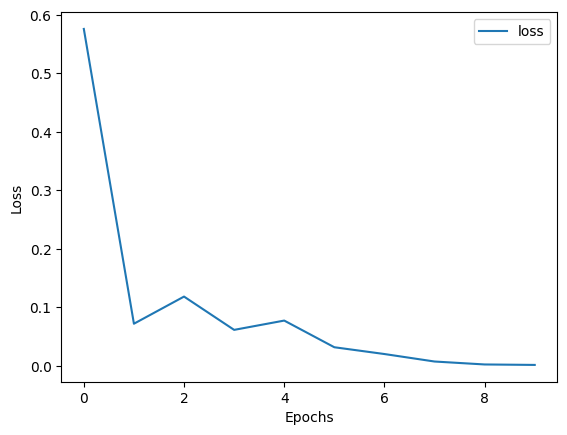

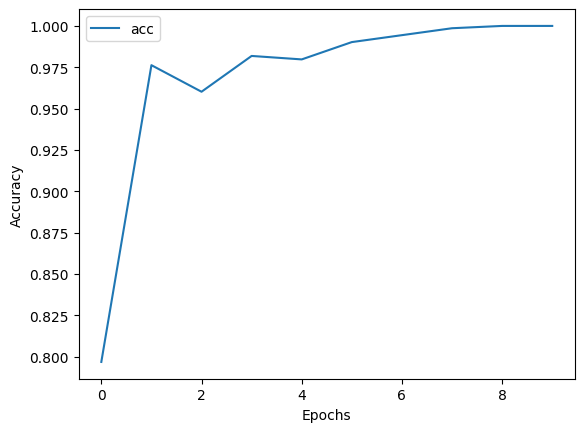

In [10]:
plot_history(History)

In [ ]:
from sklearn import svm
classifier_svm_CNN = svm.LinearSVC()
classifier_svm_CNN.fit(trainFeature_CNN, y_train)

In [ ]:
Class_Voting=classifier_svm_CNN.predict(testFeature_CNN)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,Class_Voting))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       115
           1       0.99      0.98      0.98       122
           2       0.99      0.97      0.98       118
           3       0.96      0.96      0.96       114
           4       0.98      1.00      0.99       123
           5       0.89      0.96      0.92        67
           6       0.98      0.98      0.98       121

    accuracy                           0.98       780
   macro avg       0.97      0.98      0.97       780
weighted avg       0.98      0.98      0.98       780



In [ ]:
print('Accuracy= ' + str(round(accuracy_score(y_test, Class_Voting)*100))) 

Accuracy= 98


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, Class_Voting)

array([[114,   0,   0,   1,   0,   0,   0],
       [  0, 119,   0,   0,   1,   2,   0],
       [  0,   0, 114,   0,   1,   1,   2],
       [  0,   0,   0, 109,   0,   5,   0],
       [  0,   0,   0,   0, 123,   0,   0],
       [  0,   0,   0,   3,   0,  64,   0],
       [  0,   1,   1,   0,   0,   0, 119]])